<a href="https://colab.research.google.com/github/MayteLlerena/Amazon_sales/blob/main/Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificar la ruta del archivo en Google Drive
file_path = '/content/drive/My Drive/Amazon/product.csv'

# Si prefieres cargar el archivo directamente en Colab, puedes usar el siguiente código en lugar de montar Google Drive
# uploaded = files.upload()
# file_name = list(uploaded.keys())[0]

# Importar las bibliotecas necesarias
import pandas as pd

# Leer el archivo CSV en un DataFrame
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1469 non-null   object
 1   product_name         1469 non-null   object
 2   category             1469 non-null   object
 3   discounted_price     1469 non-null   object
 4   actual_price         1469 non-null   object
 5   discount_percentage  1469 non-null   object
 6   about_product        1465 non-null   object
dtypes: object(7)
memory usage: 80.5+ KB


In [ ]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
count,1469,1469,1469,1469,1469,1469,1465
unique,1351,1337,211,550,449,92,1293
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,[CHARGE & SYNC FUNCTION]- This cable comes wit...
freq,3,5,233,53,120,56,6


In [ ]:
#Cambiar el tipo de datos de precio con descuento y precio real

df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [ ]:
#Cambiar el tipo de datos y los valores en el porcentaje de descuento

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

df['discount_percentage'] = df['discount_percentage'] / 100

df['discount_percentage']

0       0.64
1       0.43
2       0.90
3       0.53
4       0.61
        ... 
1464    0.22
1465    0.25
1466    0.28
1467    0.26
1468    0.22
Name: discount_percentage, Length: 1469, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1469 non-null   object 
 1   product_name         1469 non-null   object 
 2   category             1469 non-null   object 
 3   discounted_price     1469 non-null   float64
 4   actual_price         1469 non-null   float64
 5   discount_percentage  1469 non-null   float64
 6   about_product        1465 non-null   object 
dtypes: float64(3), object(4)
memory usage: 80.5+ KB


In [ ]:
!pip install google-cloud-bigquery pandas

from google.colab import auth
from google.cloud import bigquery
import pandas as pd

# Autenticación con Google Cloud
auth.authenticate_user()

# Configuración del cliente de BigQuery
project_id = 'amazon-411118'  # Reemplaza con tu ID de proyecto
client = bigquery.Client(project=project_id)

# Reemplaza 'nombre_de_tabla' con el nombre que deseas para la tabla en BigQuery
table_id = 'amazon-411118.pruebas.product'

# DataFrame que deseas exportar (reemplaza esto con tu propio DataFrame)
# Puedes cargar tu DataFrame directamente en lugar de crear uno de ejemplo
# Asumiendo que tu DataFrame se llama 'tu_dataframe_real'
df = df  # Reemplaza 'tu_dataframe_real' con tu DataFrame real

# Exportar DataFrame a BigQuery
job_config = bigquery.LoadJobConfig(write_disposition="WRITE_TRUNCATE")
job = client.load_table_from_dataframe(df, table_id, job_config=job_config)
job.result()  # Espera a que se complete el trabajo

print(f"DataFrame exportado a BigQuery: {table_id}")

DataFrame exportado a BigQuery: amazon-411118.pruebas.product


**Importando union tablas desde Big Query**

In [ ]:
!pip install google-cloud-bigquery
!pip install pandas
!pip install emoji
!pip install tensorflow
!pip install keras
!pip install nltk
!apt install libbz2-dev
!apt install python3-emoji
!pip install twython
!pip install wordnet
from google.cloud import bigquery
from google.colab import auth

auth.authenticate_user()

# Especifica el ID del proyecto
project_id = 'amazon-411118'
client = bigquery.Client(project=project_id)

# Especifica la consulta SQL para obtener los datos
query = 'SELECT * FROM `amazon-411118.pruebas.union_tablas`'

# Ejecuta la consulta y almacena los resultados en un DataFrame de Pandas
df1 = client.query(query).to_dataframe()

# Imprime el DataFrame
print(df1.head())

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libbz2-dev is already the newest version (1.0.8-5build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-emoji is already the newest version (1.2.0-2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
   product_id                                       product_name  \
0  B07WKBD37W  ESnipe Mart Worldwide Travel Adapter with Buil...   
1  B08L879JSN  Acer EK220Q 21.5 Inch (54.61 cm) Full HD (1920...   
2  B09XXZXQC1  Xiaomi Pad 5| Qualcomm Snapdragon 860| 120Hz R...   
3  B09TMZ1MF8  Western Digital WD Green SATA 240GB Internal S...   
4  B08C4Z69LN  Crucial RAM 8GB DDR4 3200MHz CL22 (or 2933MHz ...   

                category sub_category  discounted_price  actual_price  \
0        HomeImprovement   Electrical             425.0         999.0   
1  Compute

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1351 non-null   object 
 1   product_name         1351 non-null   object 
 2   category             1351 non-null   object 
 3   sub_category         1351 non-null   object 
 4   discounted_price     1351 non-null   float64
 5   actual_price         1351 non-null   float64
 6   discount_percentage  1351 non-null   float64
 7   about_product        1351 non-null   object 
 8   user_id              1351 non-null   object 
 9   user_name            1351 non-null   object 
 10  review_id            1351 non-null   object 
 11  review_title         1351 non-null   object 
 12  review_content       1351 non-null   object 
 13  img_link             1351 non-null   Int64  
 14  product_link         1351 non-null   Int64  
 15  rating               1351 non-null   f

In [ ]:
df1.describe()

,discounted_price,actual_price,discount_percentage,img_link,product_link,rating,rating_count
count,1351.000000,1351.000000,1351.000000,1351.0,1351.0,1351.00000,1351.0
mean,3304.809896,5690.510452,0.466788,0.659511,0.659511,4.09171,17618.373797
std,7173.981762,11218.918302,0.216212,0.474049,0.474049,0.29738,42119.882419
min,39.000000,39.000000,0.000000,0.0,0.0,2.00000,0.0
25%,349.000000,899.000000,0.310000,0.0,0.0,3.90000,1094.5
50%,899.000000,1790.000000,0.490000,1.0,1.0,4.10000,4736.0
75%,2174.000000,4575.000000,0.620000,1.0,1.0,4.30000,15995.0
max,77990.000000,139900.000000,0.940000,1.0,1.0,5.00000,426973.0


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Para lematizar
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji

# Descargar el recurso 'stopwords' si no está presente
nltk.download('stopwords')
# Descargar el recurso 'wordnet' si no está presente
nltk.download('wordnet')

%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
sns.set_style("darkgrid")
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import re, string, nltk
import emoji, bz2
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def clean_text(df, review_content, review_content_clean):
    df1[review_content_clean] = df1[review_content].str.replace(r"@"," at ")
    df1[review_content_clean] = df1[review_content_clean].str.replace("#[^a-zA-Z0-9_]+"," ")
    df1[review_content_clean] = df1[review_content_clean].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    df1[review_content_clean] = df1[review_content_clean].str.replace(r"http\S+","")
    df1[review_content_clean] = df1[review_content_clean].str.lower()

    return df1

In [ ]:
# Visualizar las columnas original y limpia
review_content = "review_content"
review_content_clean = "review_content_clean"

clean_text(df1, review_content, review_content_clean)

# Visualizar las columnas original y limpia
print(df1[[review_content, review_content_clean]])

                                         review_content  \
0     I can say costly, although it can do the job,I...   
1     Good product i am giving this review after 2mo...   
2     first i would like to comment on the tab marke...   
3     WD only names ENJOYED PRODUCT,good,Speed is as...   
4     I installed it in my ASUS TUF FX505DT and i us...   
...                                                 ...   
1346  A good battery set for use with cordless phone...   
1347  Does not have enough oomph and quickly loses p...   
1348  👌,1 bati , 5 bati,Voltage and performance is n...   
1349  Made in Indonesia, (thankfully not China).,Goo...   
1350  Works good,Bought it to replace my Phillips QT...   

                                   review_content_clean  
0     i can say costly, although it can do the job,i...  
1     good product i am giving this review after  mo...  
2     first i would like to comment on the tab marke...  
3     wd only names enjoyed product,good,speed is as...  
4

**Utilizando un lematizador para eliminar los tiempos verbales de los textos.**

In [ ]:
lemmatizer = WordNetLemmatizer()
i = 0

def preprocess_text(text):
    global i
    if i % 100 == 0:
        print(i)
    i += 1
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = emoji.demojize(text)
    text = [lemmatizer.lemmatize(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

df1["review_content_clean"] = df1["review_content_clean"].apply(preprocess_text)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


**Análisis de sentimiento**

In [ ]:
#Subsetting Reviews

df2 = df1[['product_id','review_title','review_content_clean']]

In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Calculando el puntaje de polaridad en todo el conjunto de datos**

In [ ]:
res = {}

for i, row in tqdm(df1.iterrows(), total=len(df2)):
    review_desc =row['review_content_clean']
    myid = row['product_id']
    res[myid] = sia.polarity_scores(review_desc)

  0%|          | 0/1351 [00:00<?, ?it/s]

In [ ]:
pol_score = pd.DataFrame(res).T
pol_score = pol_score.reset_index().rename(columns={'index' : 'product_id'})

pol_score

,product_id,neg,neu,pos,compound
0,B07WKBD37W,0.068,0.663,0.269,0.8885
1,B08L879JSN,0.020,0.583,0.396,0.9929
2,B09XXZXQC1,0.045,0.730,0.226,0.9996
3,B09TMZ1MF8,0.055,0.526,0.420,0.9933
4,B08C4Z69LN,0.049,0.714,0.237,0.9952
...,...,...,...,...,...
1346,B075DB1F13,0.061,0.642,0.296,0.9763
1347,B08QDPB1SL,0.040,0.571,0.389,0.9595
1348,B08Y57TPDM,0.000,0.737,0.263,0.9645
1349,B00LVMTA2A,0.000,0.491,0.509,0.9716


**Combinando el DataFrame con los puntajes de polaridad.**

In [ ]:
df3 = df1.merge(pol_score, how='left')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 0 to 1350
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1351 non-null   object 
 1   product_name          1351 non-null   object 
 2   category              1351 non-null   object 
 3   sub_category          1351 non-null   object 
 4   discounted_price      1351 non-null   float64
 5   actual_price          1351 non-null   float64
 6   discount_percentage   1351 non-null   float64
 7   about_product         1351 non-null   object 
 8   user_id               1351 non-null   object 
 9   user_name             1351 non-null   object 
 10  review_id             1351 non-null   object 
 11  review_title          1351 non-null   object 
 12  review_content        1351 non-null   object 
 13  img_link              1351 non-null   Int64  
 14  product_link          1351 non-null   Int64  
 15  rating               

In [ ]:
df3.describe()

,discounted_price,actual_price,discount_percentage,img_link,product_link,rating,rating_count,neg,neu,pos,compound
count,1351.000000,1351.000000,1351.000000,1351.0,1351.0,1351.00000,1351.0,1351.000000,1351.000000,1351.000000,1351.000000
mean,3304.809896,5690.510452,0.466788,0.659511,0.659511,4.09171,17618.373797,0.053370,0.590785,0.355837,0.952031
std,7173.981762,11218.918302,0.216212,0.474049,0.474049,0.29738,42119.882419,0.045874,0.099463,0.110547,0.154452
min,39.000000,39.000000,0.000000,0.0,0.0,2.00000,0.0,0.000000,0.157000,0.000000,-0.752300
25%,349.000000,899.000000,0.310000,0.0,0.0,3.90000,1094.5,0.023000,0.531000,0.273500,0.967400
50%,899.000000,1790.000000,0.490000,1.0,1.0,4.10000,4736.0,0.047000,0.600000,0.345000,0.984600
75%,2174.000000,4575.000000,0.620000,1.0,1.0,4.30000,15995.0,0.076000,0.666000,0.422000,0.992700
max,77990.000000,139900.000000,0.940000,1.0,1.0,5.00000,426973.0,0.557000,0.900000,0.773000,0.999900


                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.962267            -0.236517   
actual_price                 0.962267      1.000000            -0.111830   
discount_percentage         -0.236517     -0.111830             1.000000   
img_link                     0.090534      0.090635             0.199195   
product_link                 0.090534      0.090635             0.199195   
rating                       0.126418      0.127212            -0.160770   
rating_count                -0.023811     -0.034191             0.003356   
neg                          0.100455      0.087808            -0.031548   
neu                          0.147145      0.146348            -0.036723   
pos                         -0.174224     -0.168329             0.046095   
compound                     0.031111      0.030948            -0.016735   

                     img_link  product_link    rating  rating_count       neg  \
discou

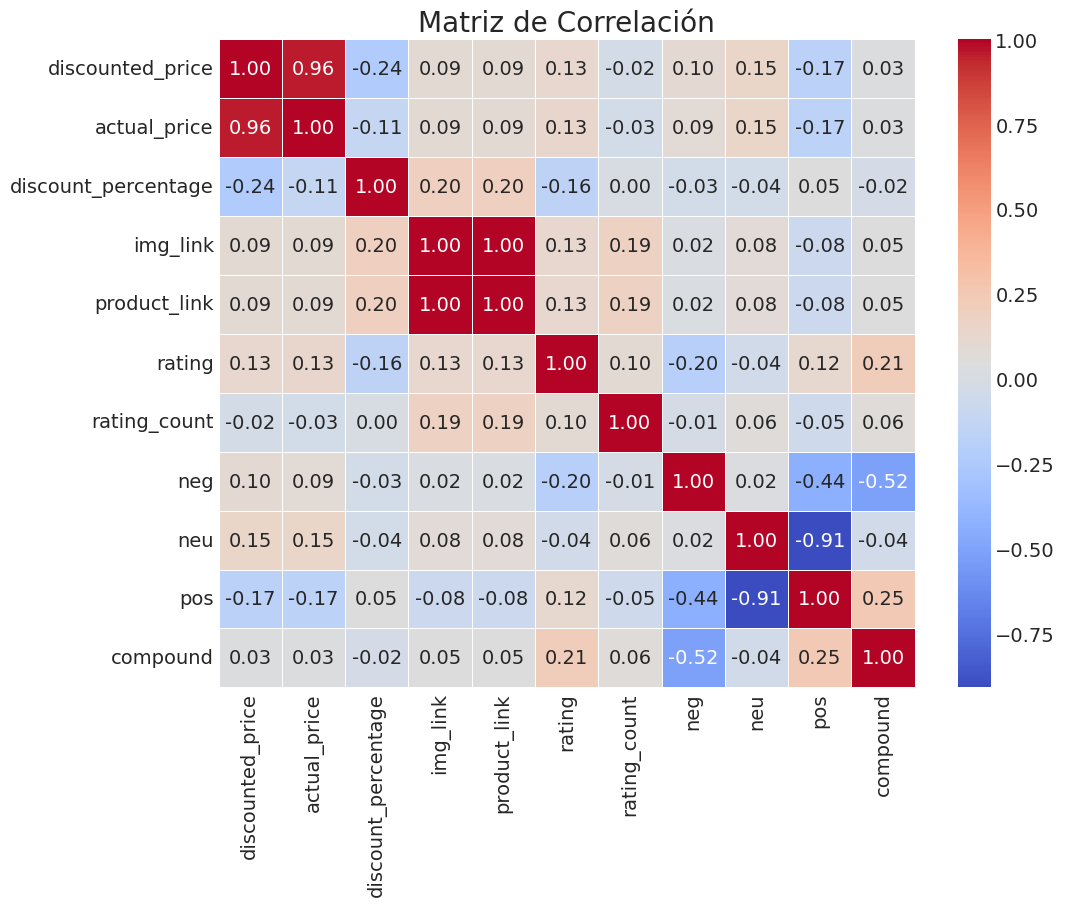

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = df3.corr()

# Muestra la matriz de correlación
print(correlation_matrix)

# Crea un mapa de calor usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

**Importando librerías para validación de hipótesis | Prueba t de Fisher transformada**

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

**Hipótesis 1**

In [ ]:
# Calcula la correlación de Pearson y realiza la prueba de significancia
r, p_value = pearsonr(df3['discount_percentage'], df3['rating'])

# Imprime los resultados
print(f"Correlación de Pearson: {r}")
print(f"Valor p: {p_value}")

# Comparar con un umbral de significancia (por ejemplo, 0.05)
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una correlación significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

Correlación de Pearson: -0.16076983052576677
Valor p: 2.8075394752223675e-09
Se rechaza la hipótesis nula. Hay una correlación significativa.


**Hipótesis 2**

In [ ]:
# Calcula la correlación de Pearson y realiza la prueba de significancia
r, p_value = pearsonr(df3['compound'], df3['rating_count'])

# Imprime los resultados
print(f"Correlación de Pearson: {r}")
print(f"Valor p: {p_value}")

# Comparar con un umbral de significancia (por ejemplo, 0.05)
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una correlación significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

Correlación de Pearson: 0.062438626129211576
Valor p: 0.021727026385635877
Se rechaza la hipótesis nula. Hay una correlación significativa.


**Hipótesis 3**

In [ ]:
# Calcula la correlación de Pearson y realiza la prueba de significancia
r, p_value = pearsonr(df3['compound'], df3['rating'])

# Imprime los resultados
print(f"Correlación de Pearson: {r}")
print(f"Valor p: {p_value}")

# Comparar con un umbral de significancia (por ejemplo, 0.05)
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una correlación significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

Correlación de Pearson: 0.21087500470766776
Valor p: 4.802919673151771e-15
Se rechaza la hipótesis nula. Hay una correlación significativa.


**Hipótesis 4**

In [ ]:
# Calcula la correlación de Pearson y realiza la prueba de significancia
r, p_value = pearsonr(df3['discount_percentage'], df3['compound'])

# Imprime los resultados
print(f"Correlación de Pearson: {r}")
print(f"Valor p: {p_value}")

# Comparar con un umbral de significancia (por ejemplo, 0.05)
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una correlación significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

Correlación de Pearson: -0.01673542874352643
Valor p: 0.5388187353782057
No hay suficiente evidencia para rechazar la hipótesis nula.


**Importando librerías para la regresión lineal**

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Hipótesis 1**

Error Cuadrático Medio en el conjunto de prueba: 0.08524987291908688


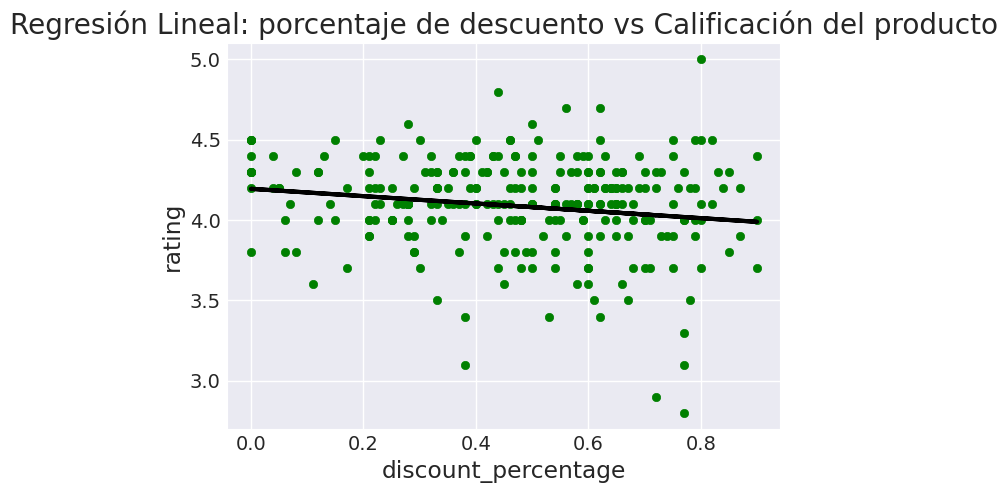

In [ ]:
# Seleccionar las variables de interés
df4 = df3[['discount_percentage', 'rating']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df4[['discount_percentage']]
y = df4['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio en el conjunto de prueba: {mse}")

# Visualizar los resultados
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.xlabel('discount_percentage')
plt.ylabel('rating')
plt.title('Regresión Lineal: porcentaje de descuento vs Calificación del producto')
plt.show()

In [ ]:
# Obtener los coeficientes del modelo
coefficients = model.coef_

# Imprimir los coeficientes
print(f"Coeficiente: {coefficients[0]}")

# También puedes imprimir la intersección y la pendiente
print(f"Intersección: {model.intercept_}")
print(f"Pendiente: {model.coef_[0]}")

Coeficiente: -0.22824380801760066
Intersección: 4.194872210446987
Pendiente: -0.22824380801760066


**Gráfico Q-Q (Quantile-Quantile) plot compara la distribución de los residuos con la distribución teórica normal**

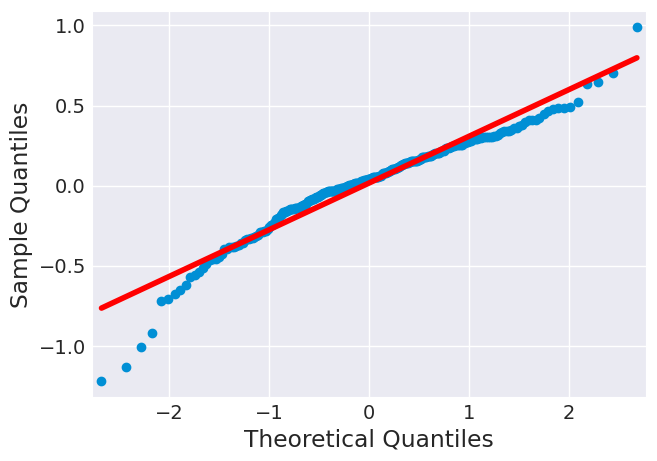

In [ ]:
residuals = y_test - y_pred
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.show()

**Hipótesis 2**

Error Cuadrático Medio en el conjunto de prueba: 1955703969.2212105


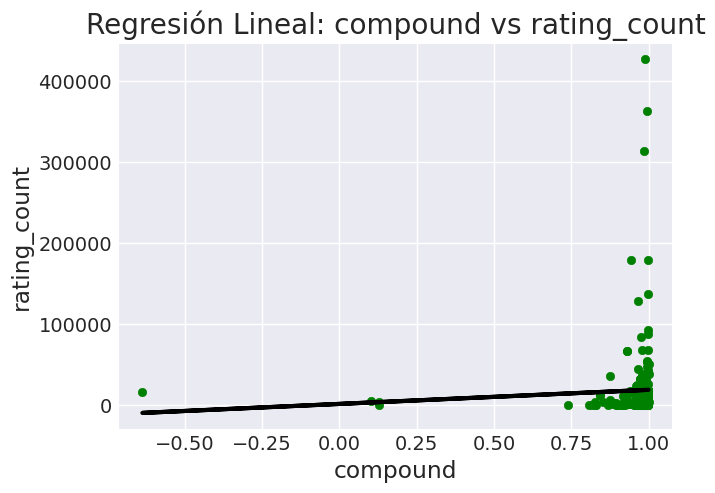

In [ ]:
# Seleccionar las variables de interés
df5 = df3[['compound', 'rating_count']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df5[['compound']]
y = df5['rating_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio en el conjunto de prueba: {mse}")

# Visualizar los resultados
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.xlabel('compound')
plt.ylabel('rating_count')
plt.title('Regresión Lineal: compound vs rating_count')
plt.show()

In [ ]:
# Obtener los coeficientes del modelo
coefficients = model.coef_

# Imprimir los coeficientes
print(f"Coeficiente: {coefficients[0]}")

# También puedes imprimir la intersección y la pendiente
print(f"Intersección: {model.intercept_}")
print(f"Pendiente: {model.coef_[0]}")

Coeficiente: 17444.865200589065
Intersección: 1299.9524266417975
Pendiente: 17444.865200589065


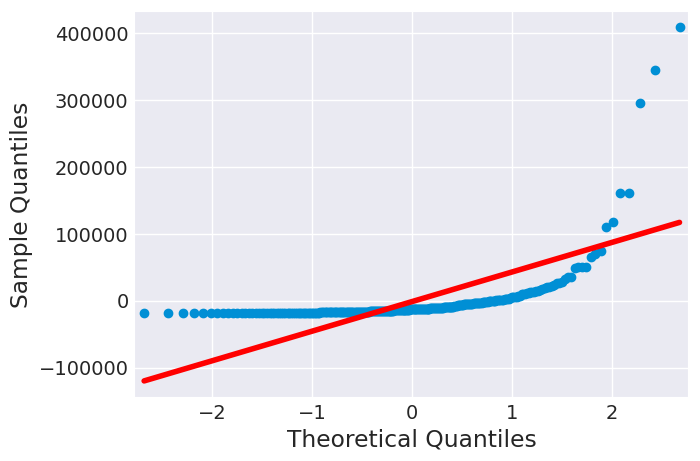

In [ ]:
residuals = y_test - y_pred
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.show()

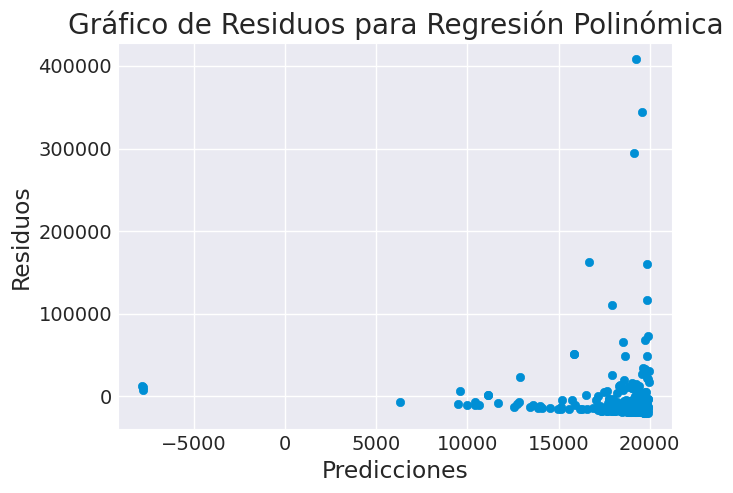

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Crear y ajustar el modelo de regresión polinómica
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

# Hacer predicciones
y_pred_poly = polyreg.predict(X_test)

# Visualizar el gráfico de residuos
residuals_poly = y_test - y_pred_poly
plt.scatter(y_pred_poly, residuals_poly)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos para Regresión Polinómica')
plt.show()

**Hipótesis 3**

Error Cuadrático Medio en el conjunto de prueba: 0.08692884433783754


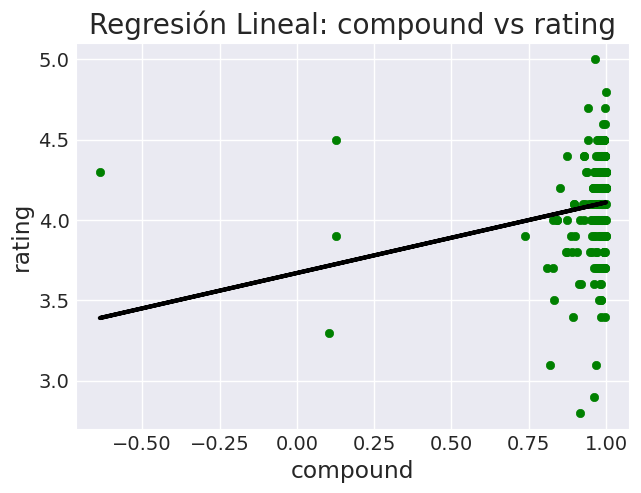

In [ ]:
# Seleccionar las variables de interés
df6 = df3[['compound', 'rating']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df6[['compound']]
y = df6['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio en el conjunto de prueba: {mse}")

# Visualizar los resultados
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.xlabel('compound')
plt.ylabel('rating')
plt.title('Regresión Lineal: compound vs rating')
plt.show()

In [ ]:
# Obtener los coeficientes del modelo
coefficients = model.coef_

# Imprimir los coeficientes
print(f"Coeficiente: {coefficients[0]}")

# También puedes imprimir la intersección y la pendiente
print(f"Intersección: {model.intercept_}")
print(f"Pendiente: {model.coef_[0]}")

Coeficiente: 0.4397792774214113
Intersección: 3.670684490572613
Pendiente: 0.4397792774214113


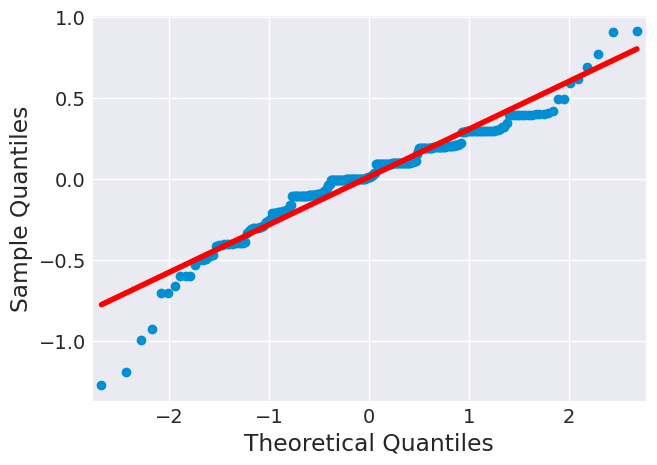

In [ ]:
residuals = y_test - y_pred
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.show()

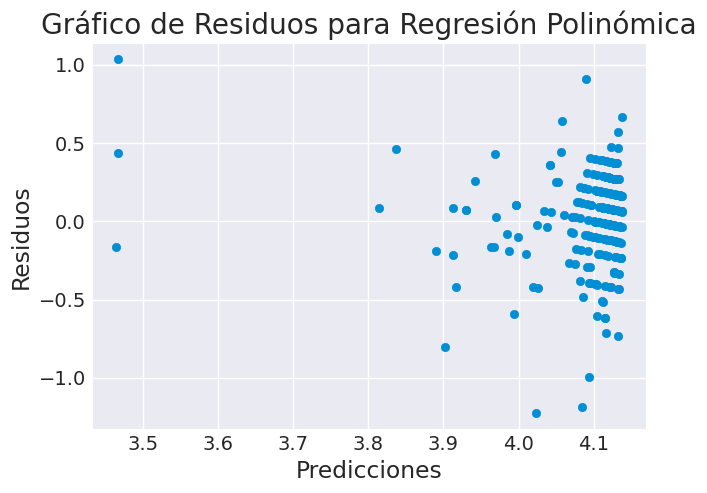

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Crear y ajustar el modelo de regresión polinómica
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

# Hacer predicciones
y_pred_poly = polyreg.predict(X_test)

# Visualizar el gráfico de residuos
residuals_poly = y_test - y_pred_poly
plt.scatter(y_pred_poly, residuals_poly)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos para Regresión Polinómica')
plt.show()

**Hipótesis 4**

Error Cuadrático Medio en el conjunto de prueba: 0.018930625805895877


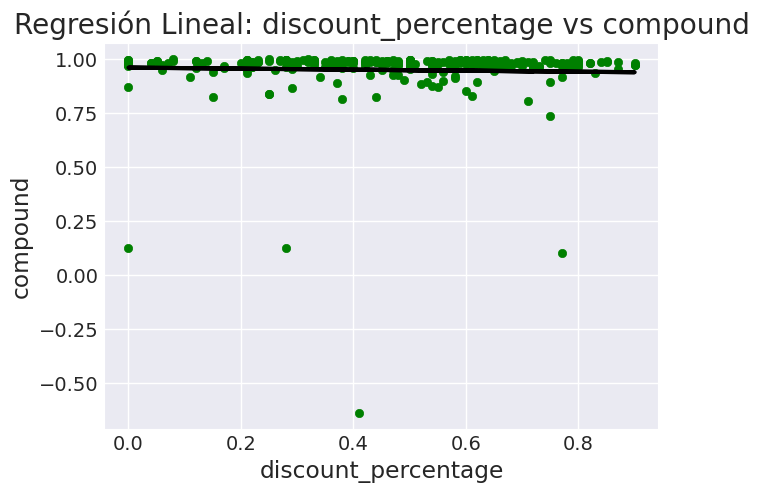

In [ ]:
# Seleccionar las variables de interés
df7 = df3[['discount_percentage', 'compound']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df7[['discount_percentage']]
y = df7['compound']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio en el conjunto de prueba: {mse}")

# Visualizar los resultados
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.xlabel('discount_percentage')
plt.ylabel('compound')
plt.title('Regresión Lineal: discount_percentage vs compound')
plt.show()

In [ ]:
# Obtener los coeficientes del modelo
coefficients = model.coef_

# Imprimir los coeficientes
print(f"Coeficiente: {coefficients[0]}")

# También puedes imprimir la intersección y la pendiente
print(f"Intersección: {model.intercept_}")
print(f"Pendiente: {model.coef_[0]}")

Coeficiente: -0.023687693918952278
Intersección: 0.9619407792809401
Pendiente: -0.023687693918952278


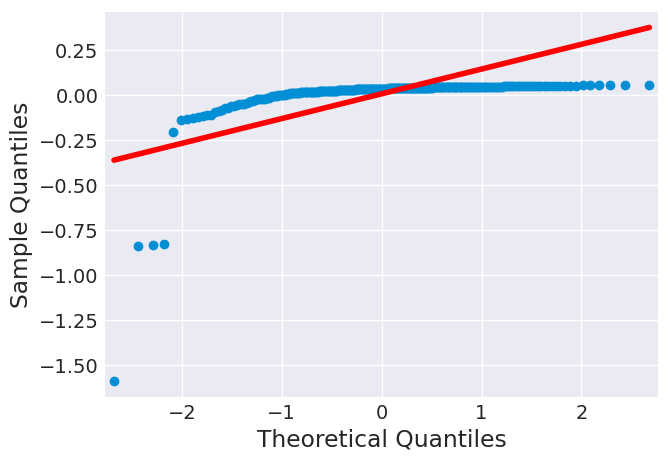

In [ ]:
residuals = y_test - y_pred
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.show()

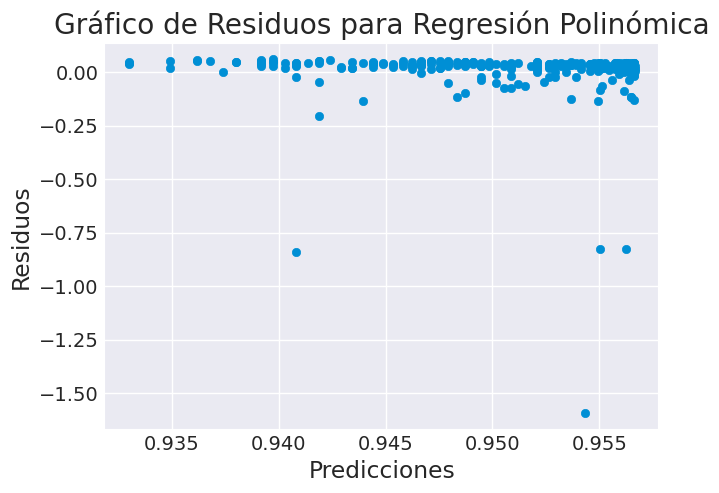

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Crear y ajustar el modelo de regresión polinómica
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

# Hacer predicciones
y_pred_poly = polyreg.predict(X_test)

# Visualizar el gráfico de residuos
residuals_poly = y_test - y_pred_poly
plt.scatter(y_pred_poly, residuals_poly)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos para Regresión Polinómica')
plt.show()

**Exportar el df3 a Big Query para crear las categorías de sentimiento**

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

# Autenticación con Google Cloud
auth.authenticate_user()

# Configuración del cliente de BigQuery
project_id = 'amazon-411118'  # Reemplaza con tu ID de proyecto
client = bigquery.Client(project=project_id)

# Reemplaza 'nombre_de_tabla' con el nombre que deseas para la tabla en BigQuery
table_id = 'amazon-411118.pruebas.tabla_general'

# DataFrame que deseas exportar (reemplaza esto con tu propio DataFrame)
# Puedes cargar tu DataFrame directamente en lugar de crear uno de ejemplo
# Asumiendo que tu DataFrame se llama 'tu_dataframe_real'
df = df3  # Reemplaza 'tu_dataframe_real' con tu DataFrame real

# Exportar DataFrame a BigQuery
job_config = bigquery.LoadJobConfig(write_disposition="WRITE_TRUNCATE")
job = client.load_table_from_dataframe(df, table_id, job_config=job_config)
job.result()  # Espera a que se complete el trabajo

print(f"DataFrame exportado a BigQuery: {table_id}")

DataFrame exportado a BigQuery: amazon-411118.pruebas.tabla_general
